# Examples of spectra
## Toolboxes

In [1]:
import numpy as np
import rt_anatools
import matplotlib.pyplot     as plt
from scipy.signal import lfilter # For red noise generation
%matplotlib inline

## Parameters

In [131]:
N = 5000
t = np.arange(N)
Fs = 1.
units = 'days'

## I/ White noise
### Compute time serie

In [132]:
y_white = np.random.randn(N)

### Generate spectra

In [133]:
PSD_white,freq = rt_anatools.compute_spectrum(y_white,Fs,taper=None,dof=2)
PSD_white_20,freq_20 = rt_anatools.compute_spectrum(y_white,Fs,taper=None,dof=20)

### Plot figure

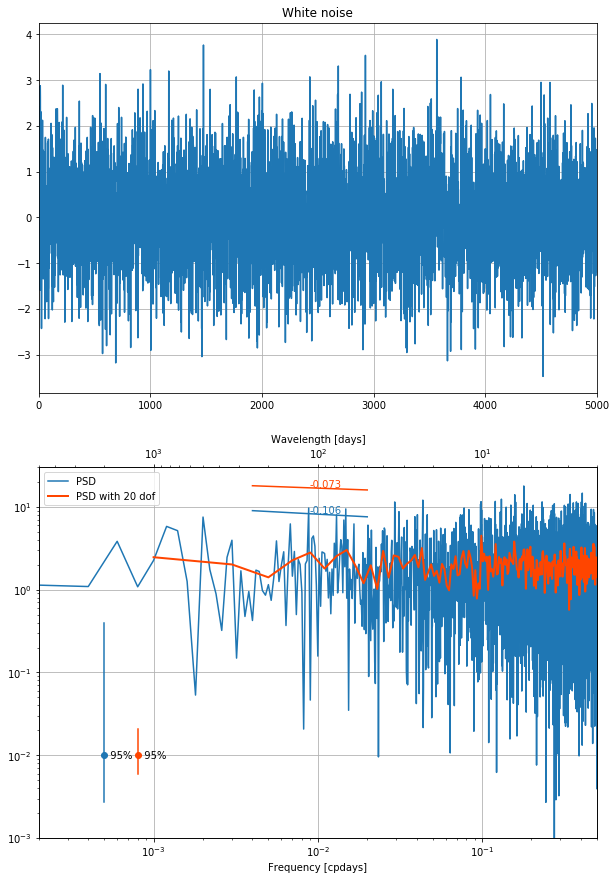

In [134]:
fig = plt.figure(figsize=(10,15));
### Time serie
plt.subplot(2,1,1)
plt.plot(t,y_white)
plt.xlim([t.min(),t.max()])
plt.title('White noise')
plt.grid()
### Plot spectra
plt.subplot(2,1,2)
## Original spectrum
plt_psd = plt.loglog(freq,PSD_white,label='PSD')
color_PSD = plt_psd[0].get_color()
# Plot slope
slope_PSD = rt_anatools.compute_spectrum_slope(PSD_white,freq,[1e-3,.1])
rt_anatools.plot_spectrum_slope(4e-3,2e-2,9,slope_PSD,color=color_PSD)
# Plot confidence interval
conf_coeff = rt_anatools.confidence_fft(2, alpha=0.95)
conf_point = [5e-4,1e-2]
plt.loglog(conf_point[0],conf_point[1],'o',color=color_PSD)
plt.loglog([conf_point[0],conf_point[0]],\
           [conf_point[1]*conf_coeff[0],conf_point[1]*conf_coeff[1]],\
           color=color_PSD)
txt = plt.text(conf_point[0],conf_point[1],'  95%',verticalalignment='center')
## Filtered spectrum
plt_psd = plt.loglog(freq_20,PSD_white_20,label='PSD with 20 dof',color='orangered',linewidth=2)
color_PSD_20 = plt_psd[0].get_color()
# Plot slope
slope_PSD_20 = rt_anatools.compute_spectrum_slope(PSD_white_20,freq_20,[1e-3,.1])
rt_anatools.plot_spectrum_slope(4e-3,2e-2,18,slope_PSD_20,color=color_PSD_20)
# Plot confidence interval
conf_coeff_20 = rt_anatools.confidence_fft(20, alpha=0.95)
conf_point_20 = [8e-4,1e-2]
plt.loglog(conf_point_20[0],conf_point_20[1],'o',color=color_PSD_20)
plt.loglog([conf_point_20[0],conf_point_20[0]],\
           [conf_point_20[1]*conf_coeff_20[0],conf_point_20[1]*conf_coeff_20[1]],\
           color=color_PSD_20)
txt = plt.text(conf_point_20[0],conf_point_20[1],'  95%',verticalalignment='center')
### Customize plot
plt.grid()
plt.legend()
plt.ylim([1e-3,30])
plt.xlim([freq[1],freq[-1]])
ax = plt.gca()
ax.set_xlabel('Frequency [cp' + units + ']')
rt_anatools.add_wavelength_axis_to_spectrum(ax,units)


## II/ Red noise

### Compute time serie

In [135]:
y_red = lfilter(np.array([1]),np.array([1,-0.99]), np.random.randn(N))
y_red = y_red/np.std(y_red)

### Generate spectra

In [136]:
PSD_red,freq        = rt_anatools.compute_spectrum(y_red,Fs,taper=None,dof=2)
PSD_red_H,freq      = rt_anatools.compute_spectrum(y_red,Fs,taper='Hann',dof=2)
PSD_red_H20,freq_20 = rt_anatools.compute_spectrum(y_red,Fs,taper='Hann',dof=20)

### Plot figure

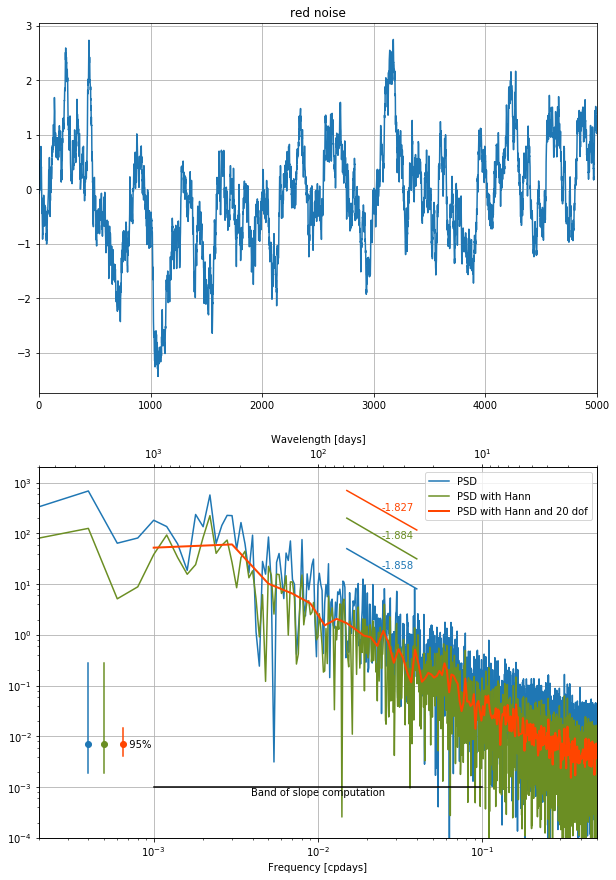

In [151]:
fig = plt.figure(figsize=(10,15));plt.clf()
### Time serie
plt.subplot(2,1,1)
plt.plot(t,y_red)
plt.xlim([t.min(),t.max()])
plt.title('red noise')
plt.grid()
### Plot spectra
plt.subplot(2,1,2)
freq_lim_slope = [1e-3,.1]
## Original spectrum
plt_psd = plt.loglog(freq,PSD_red,label='PSD')
color_PSD = plt_psd[0].get_color()
# Plot slope
slope_PSD = rt_anatools.compute_spectrum_slope(PSD_red,freq,freq_lim_slope)
rt_anatools.plot_spectrum_slope(1.5e-2,4e-2,50,slope_PSD,color=color_PSD)
# Plot confidence interval
conf_coeff = rt_anatools.confidence_fft(2, alpha=0.95)
conf_point = [4e-4,7e-3]
plt.loglog(conf_point[0],conf_point[1],'o',color=color_PSD)
plt.loglog([conf_point[0],conf_point[0]],\
           [conf_point[1]*conf_coeff[0],conf_point[1]*conf_coeff[1]],\
           color=color_PSD)
## Hann window spectrum
plt_psd = plt.loglog(freq,PSD_red_H,label='PSD with Hann',color='olivedrab')
color_PSD_H = plt_psd[0].get_color()
# Plot slope
slope_PSD_H = rt_anatools.compute_spectrum_slope(PSD_red_H,freq,freq_lim_slope)
rt_anatools.plot_spectrum_slope(1.5e-2,4e-2,2e2,slope_PSD_H,color=color_PSD_H)
# Plot confidence interval
conf_coeff_H = rt_anatools.confidence_fft(2, alpha=0.95)
conf_point_H = [5e-4,7e-3]
plt.loglog(conf_point_H[0],conf_point_H[1],'o',color=color_PSD_H)
plt.loglog([conf_point_H[0],conf_point_H[0]],\
           [conf_point_H[1]*conf_coeff_H[0],conf_point_H[1]*conf_coeff_H[1]],\
           color=color_PSD_H)
## Hann window and filtered spectrum
plt_psd = plt.loglog(freq_20,PSD_red_H20,label='PSD with Hann and 20 dof',color='orangered',linewidth=2)
color_PSD_H20 = plt_psd[0].get_color()
# Plot slope
slope_PSD_H20 = rt_anatools.compute_spectrum_slope(PSD_red_H20,freq_20,freq_lim_slope)
rt_anatools.plot_spectrum_slope(1.5e-2,4e-2,7e2,slope_PSD_H20,color=color_PSD_H20)
# Plot confidence interval
conf_coeff_H20 = rt_anatools.confidence_fft(20, alpha=0.95)
conf_point_H20 = [6.5e-4,7e-3]
plt.loglog(conf_point_H20[0],conf_point_H20[1],'o',color=color_PSD_H20)
plt.loglog([conf_point_H20[0],conf_point_H20[0]],\
           [conf_point_H20[1]*conf_coeff_H20[0],conf_point_H20[1]*conf_coeff_H20[1]],\
           color=color_PSD_H20)
txt = plt.text(conf_point_H20[0],conf_point_H20[1],'  95%',verticalalignment='center')
### Customize plot
plt.grid()
plt.legend()
plt.ylim([1e-4,2e3])
plt.xlim([freq[1],freq[-1]])
plt.plot(freq_lim_slope,[1e-3,1e-3],'k')
plt.text(.01,7e-4,'Band of slope computation',horizontalalignment='center')
ax = plt.gca()
ax.set_xlabel('Frequency [cp' + units + ']')
rt_anatools.add_wavelength_axis_to_spectrum(ax,units)


## III/ One harmonic

### Compute time serie

In [138]:
f1 = 1/100.
y_harmo = np.cos(2*np.pi*f1*t)+0.001*np.random.randn(N)

### Generate spectra

In [139]:
PSD_harmo,freq       = rt_anatools.compute_spectrum(y_harmo,Fs,taper=None,dof=2)
PSD_harmo_20,freq_20 = rt_anatools.compute_spectrum(y_harmo,Fs,taper=None,dof=20)

### Plot figure

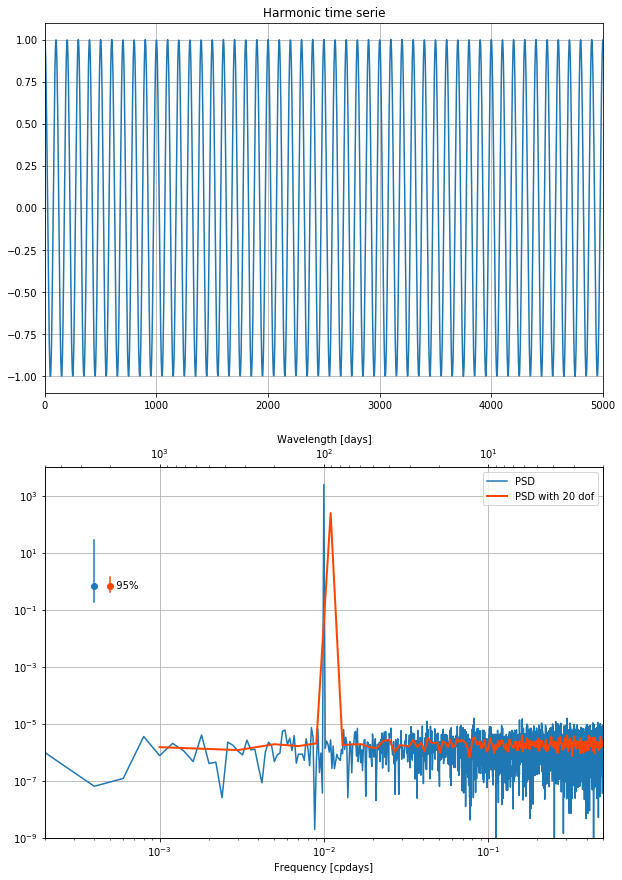

In [140]:
fig = plt.figure(figsize=(10,15));plt.clf()
plt.subplot(2,1,1)
plt.plot(t,y_harmo)
plt.xlim([t.min(),t.max()])
plt.title('Harmonic time serie')
plt.grid()
plt.subplot(2,1,2)
### Original spectrum
plt_psd = plt.loglog(freq,PSD_harmo,label='PSD')
color_PSD = plt_psd[0].get_color()
# Plot confidence interval
conf_coeff = rt_anatools.confidence_fft(2, alpha=0.95)
conf_point = [4e-4,7e-1]
plt.loglog(conf_point[0],conf_point[1],'o',color=color_PSD)
plt.loglog([conf_point[0],conf_point[0]],\
           [conf_point[1]*conf_coeff[0],conf_point[1]*conf_coeff[1]],\
           color=color_PSD)
### Filtered spectrum
plt_psd = plt.loglog(freq_20,PSD_harmo_20,label='PSD with 20 dof',color='orangered',linewidth=2)
color_PSD_20 = plt_psd[0].get_color()
# Plot confidence interval
conf_coeff_20 = rt_anatools.confidence_fft(20, alpha=0.95)
conf_point_20 = [5e-4,7e-1]
plt.loglog(conf_point_20[0],conf_point_20[1],'o',color=color_PSD_20)
plt.loglog([conf_point_20[0],conf_point_20[0]],\
           [conf_point_20[1]*conf_coeff_20[0],conf_point_20[1]*conf_coeff_20[1]],\
           color=color_PSD_20)
txt = plt.text(conf_point_20[0],conf_point_20[1],'  95%',verticalalignment='center')
### Customize plot
plt.grid()
plt.legend()
plt.ylim([1e-9,1e4])
plt.xlim([freq[1],freq[-1]])
ax = plt.gca()
ax.set_xlabel('Frequency [cp' + units + ']')
rt_anatools.add_wavelength_axis_to_spectrum(ax,units)


## IV/ Leaking harmonic

### Compute time serie

In [141]:
f1 = 1/99.
y_harmo2 = np.cos(2*np.pi*f1*t)+0.001*np.random.randn(N)

### Generate spectra

In [142]:
PSD_harmo2,freq        = rt_anatools.compute_spectrum(y_harmo2,Fs,taper=None,dof=2)
PSD_harmo2_H,freq      = rt_anatools.compute_spectrum(y_harmo2,Fs,taper='Hann',dof=2)
PSD_harmo2_H20,freq_20 = rt_anatools.compute_spectrum(y_harmo2,Fs,taper='Hann',dof=20)

### Plot figure

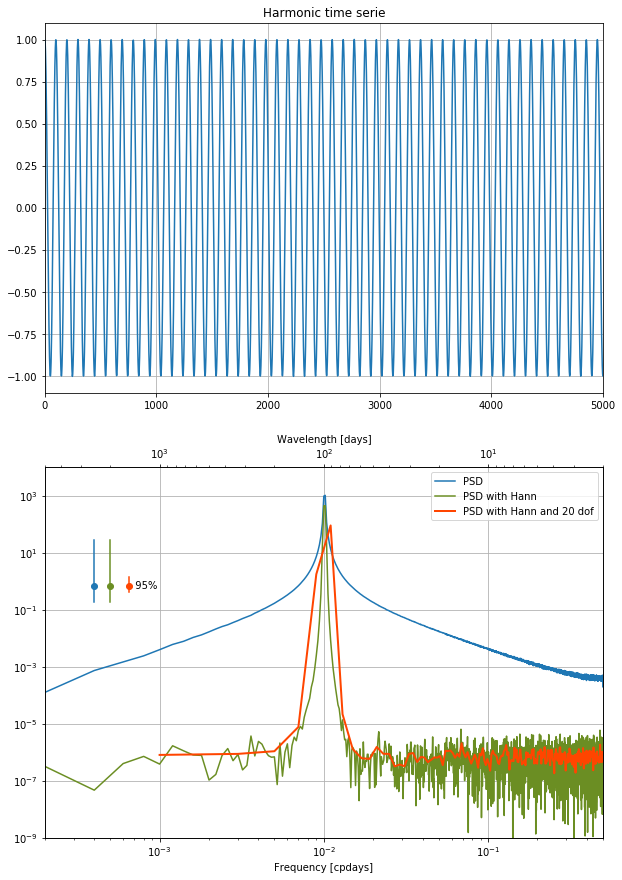

In [143]:
fig = plt.figure(figsize=(10,15));plt.clf()
plt.subplot(2,1,1)
plt.plot(t,y_harmo2)
plt.xlim([t.min(),t.max()])
plt.title('Harmonic time serie')
plt.grid()
plt.subplot(2,1,2)
### Original spectrum
plt_psd = plt.loglog(freq,PSD_harmo2,label='PSD')
color_PSD = plt_psd[0].get_color()
# Plot confidence interval
conf_coeff = rt_anatools.confidence_fft(2, alpha=0.95)
conf_point = [4e-4,7e-1]
plt.loglog(conf_point[0],conf_point[1],'o',color=color_PSD)
plt.loglog([conf_point[0],conf_point[0]],\
           [conf_point[1]*conf_coeff[0],conf_point[1]*conf_coeff[1]],\
           color=color_PSD)
### Hann window spectrum
plt_psd = plt.loglog(freq,PSD_harmo2_H,label='PSD with Hann',color='olivedrab')
color_PSD_H = plt_psd[0].get_color()
# Plot confidence interval
conf_coeff_H = rt_anatools.confidence_fft(2, alpha=0.95)
conf_point_H = [5e-4,7e-1]
plt.loglog(conf_point_H[0],conf_point_H[1],'o',color=color_PSD_H)
plt.loglog([conf_point_H[0],conf_point_H[0]],\
           [conf_point_H[1]*conf_coeff_H[0],conf_point_H[1]*conf_coeff_H[1]],\
           color=color_PSD_H)
### Filtered spectrum
plt_psd = plt.loglog(freq_20,PSD_harmo2_H20,label='PSD with Hann and 20 dof',color='orangered',linewidth=2)
color_PSD_H20 = plt_psd[0].get_color()
# Plot confidence interval
conf_coeff_20 = rt_anatools.confidence_fft(20, alpha=0.95)
conf_point_20 = [6.5e-4,7e-1]
plt.loglog(conf_point_20[0],conf_point_20[1],'o',color=color_PSD_H20)
plt.loglog([conf_point_20[0],conf_point_20[0]],\
           [conf_point_20[1]*conf_coeff_20[0],conf_point_20[1]*conf_coeff_20[1]],\
           color=color_PSD_H20)
txt = plt.text(conf_point_20[0],conf_point_20[1],'  95%',verticalalignment='center')
### Customize plot
plt.grid()
plt.legend()
plt.ylim([1e-9,1e4])
plt.xlim([freq[1],freq[-1]])
ax = plt.gca()
ax.set_xlabel('Frequency [cp' + units + ']')
rt_anatools.add_wavelength_axis_to_spectrum(ax,units)


## V/ 'Realistic' signal

### Compute time serie

In [144]:
f1 = 1/50.
f2 = 1/110.
y_reali = y_red + 0.7* np.cos(2*np.pi*f1*t) + 0.4*np.cos(2*np.pi*f2*t) + 0.1*y_white

### Generate spectra

In [145]:
PSD_reali,freq        = rt_anatools.compute_spectrum(y_reali,Fs,taper=None,dof=2)
PSD_reali_H,freq      = rt_anatools.compute_spectrum(y_reali,Fs,taper='Hann',dof=2)
PSD_reali_H20,freq_20 = rt_anatools.compute_spectrum(y_reali,Fs,taper='Hann',dof=20)

### Plot figure

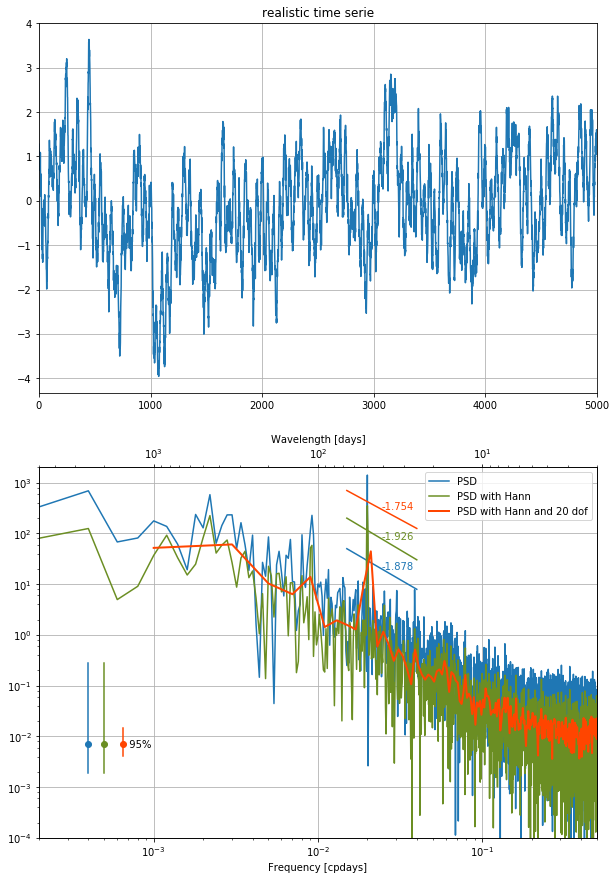

In [146]:
fig = plt.figure(figsize=(10,15));plt.clf()
plt.subplot(2,1,1)
plt.plot(t,y_reali)
plt.xlim([t.min(),t.max()])
plt.title('realistic time serie')
plt.grid()
plt.subplot(2,1,2)
freq_lim_slope = [1e-3,5e-2]
### Original spectrum
plt_psd = plt.loglog(freq,PSD_reali,label='PSD')
color_PSD = plt_psd[0].get_color()
# Plot slope
slope_PSD = rt_anatools.compute_spectrum_slope(PSD_reali,freq,freq_lim_slope)
rt_anatools.plot_spectrum_slope(1.5e-2,4e-2,50,slope_PSD,color=color_PSD)
# Plot confidence interval
conf_coeff = rt_anatools.confidence_fft(2, alpha=0.95)
conf_point = [4e-4,7e-3]
plt.loglog(conf_point[0],conf_point[1],'o',color=color_PSD)
plt.loglog([conf_point[0],conf_point[0]],\
           [conf_point[1]*conf_coeff[0],conf_point[1]*conf_coeff[1]],\
           color=color_PSD)
### Hann window spectrum
plt_psd = plt.loglog(freq,PSD_reali_H,label='PSD with Hann',color='olivedrab')
color_PSD_H = plt_psd[0].get_color()
# Plot slope
slope_PSD_H = rt_anatools.compute_spectrum_slope(PSD_reali_H,freq,freq_lim_slope)
rt_anatools.plot_spectrum_slope(1.5e-2,4e-2,2e2,slope_PSD_H,color=color_PSD_H)
# Plot confidence interval
conf_coeff_H = rt_anatools.confidence_fft(2, alpha=0.95)
conf_point_H = [5e-4,7e-3]
plt.loglog(conf_point_H[0],conf_point_H[1],'o',color=color_PSD_H)
plt.loglog([conf_point_H[0],conf_point_H[0]],\
           [conf_point_H[1]*conf_coeff_H[0],conf_point_H[1]*conf_coeff_H[1]],\
           color=color_PSD_H)
### Filtered spectrum
plt_psd = plt.loglog(freq_20,PSD_reali_H20,label='PSD with Hann and 20 dof',color='orangered',linewidth=2)
color_PSD_H20 = plt_psd[0].get_color()
# Plot slope
slope_PSD_H20 = rt_anatools.compute_spectrum_slope(PSD_reali_H20,freq_20,freq_lim_slope)
rt_anatools.plot_spectrum_slope(1.5e-2,4e-2,7e2,slope_PSD_H20,color=color_PSD_H20)
# Plot confidence interval
conf_coeff_H20 = rt_anatools.confidence_fft(20, alpha=0.95)
conf_point_H20 = [6.5e-4,7e-3]
plt.loglog(conf_point_H20[0],conf_point_H20[1],'o',color=color_PSD_H20)
plt.loglog([conf_point_H20[0],conf_point_H20[0]],\
           [conf_point_H20[1]*conf_coeff_H20[0],conf_point_H20[1]*conf_coeff_H20[1]],\
           color=color_PSD_H20)
txt = plt.text(conf_point_H20[0],conf_point_H20[1],'  95%',verticalalignment='center')
### Customize plot
plt.grid()
plt.legend()
plt.ylim([1e-4,2e3])
plt.xlim([freq[1],freq[-1]])
ax = plt.gca()
ax.set_xlabel('Frequency [cp' + units + ']')
rt_anatools.add_wavelength_axis_to_spectrum(ax,units)

